<a href="https://colab.research.google.com/github/AjmiyaSalim/Cardio-Disease-Prediction/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Decision Tree, Random Forest, and XGBoost

**Dataset: Heart Disease Dataset **  
The Heart Disease dataset contains medical information about patients and is commonly used to predict the presence or absence of heart disease. It includes features such as age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, and others. The target variable indicates whether a patient has heart disease (usually binary: 1 for presence, 0 for absence). This dataset is widely used for classification tasks in healthcare analytics.

---

**Decision Tree:**  
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into subsets based on feature values, creating a tree-like structure of decisions. Each internal node represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label or regression value. Decision Trees are intuitive, easy to interpret, but prone to overfitting if not properly pruned.

**Random Forest:**  
Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions to improve accuracy and control overfitting. By introducing randomness through bootstrapped samples and random feature selection at each split, Random Forest reduces variance and enhances generalization performance compared to a single Decision Tree.

**XGBoost (Extreme Gradient Boosting):**  
XGBoost is a powerful and efficient gradient boosting framework that builds an ensemble of decision trees sequentially. Each new tree corrects the errors of the previous trees by optimizing a differentiable loss function using gradient descent. XGBoost incorporates regularization, weighted quantile sketch for handling sparse data, and parallel processing, making it highly effective for large-scale and complex datasets, often winning many machine learning competitions.


In [1]:
import pandas as pd
data = pd.read_csv('/content/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining datasets to understand their structure, patterns, and key characteristics before applying machine learning algorithms.  
One of the first steps in EDA is to quickly inspect a few rows from the dataset to ensure it has loaded correctly and to get an overview of the data format.

### Common EDA Functions

- **head()** – Displays the first 5 rows of the dataset by default. This helps in verifying column names, data types, and sample values at the beginning of the dataset.
- **tail()** – Displays the last 5 rows of the dataset by default. This is useful for checking if the dataset is complete and whether the end of the file has any irregularities or missing data.
- **shape** – Returns the number of rows and columns in the dataset, helping to understand the dataset’s size.
- **isna().sum()** – Counts missing values in each column, helping to detect incomplete data.
- **dtypes** – Lists the data type of each column, useful for identifying numerical, categorical, or datetime variables.
- **info()** – Provides details about column data types, non-null values, and memory usage. Useful for detecting missing values and understanding the structure.
- **describe()** – Generates descriptive statistics such as mean, standard deviation, minimum, and maximum for numerical columns.





In [2]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [6]:
data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


## Separating Numeric and Categorical Features

In data preprocessing, it is important to handle numeric and categorical features differently. Numeric features often require scaling or normalization, while categorical features may need encoding.

The select_dtypes() function can be used to separate columns by their data types:

- Selecting **categorical columns** (usually of type object) for encoding or analysis.
- Selecting **numeric columns** for scaling or other numeric operations.



In [10]:
char_feature = data.select_dtypes(include='object')
char_feature

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [11]:
for i in char_feature.columns:
  print(char_feature[i].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [12]:
numeric_feature = data.select_dtypes(include='number')
numeric_feature

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


## Label Encoding for Categorical Features

Machine learning models typically require numerical input. Therefore, categorical features need to be converted into numeric form before training.

**Label Encoding** is a simple technique that converts each unique category in a column into an integer value. This is especially useful for ordinal variables or categorical variables with no inherent order but a limited number of categories.

After separating categorical columns, Label Encoding can be applied to transform these features into numeric values compatible with machine learning algorithms.




In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in char_feature.columns:
  char_feature[col] = le.fit_transform(char_feature[col])

In [14]:
char_feature

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


## Combining Numeric and Encoded Categorical Data

After applying Label Encoding to categorical features and isolating numeric features, it is necessary to combine them back into a single dataset for model training.

The pd.concat() function is used to concatenate DataFrames along a particular axis. Here, numeric and encoded categorical DataFrames can be combined column-wise (axis=1) to form the complete processed dataset.



In [15]:
new_data=pd.concat([char_feature,numeric_feature],axis=1)
new_data

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


In [16]:
new_data.dtypes

,0
Sex,int64
ChestPainType,int64
RestingECG,int64
ExerciseAngina,int64
ST_Slope,int64
Age,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64


# Importance of Visualizing the Dataset on Different Features

Visualizing the dataset across different features is a crucial step in the data analysis and machine learning workflow because it helps to:

- **Understand Data Distribution:** Visualization reveals how individual features are distributed , helping identify outliers or anomalies.
- **Detect Relationships and Patterns:** By plotting features against each other or the target variable, we can uncover correlations, trends, or clusters that might be useful for prediction.
- **Identify Feature Importance:** Visual exploration can highlight which features differ significantly between classes or target outcomes, guiding feature selection.
- **Spot Missing or Inconsistent Data:** Visual tools can help identify missing values or inconsistencies that require cleaning.
- **Aid Model Selection and Tuning:** Insights from visualizations assist in choosing the right model and parameters by understanding the complexity of data.
- **Improve Communication:** Graphical representations make it easier to communicate findings and insights to stakeholders who may not be familiar with the technical details.

Overall, visualization provides an intuitive and powerful way to grasp the structure and nuances of the dataset before applying machine learning algorithms.


<Axes: xlabel='HeartDisease', ylabel='count'>

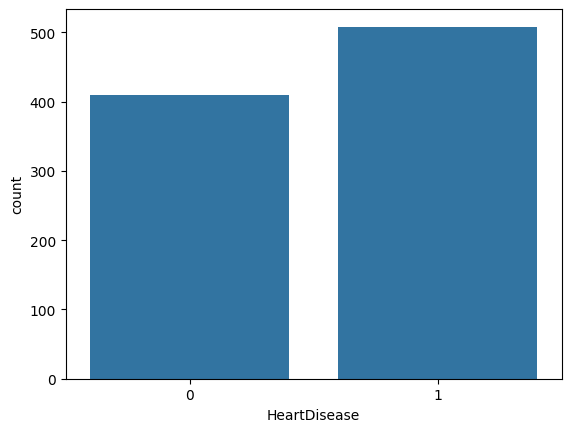

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['HeartDisease'])

# Visualizing Relationship Between Age and Cholesterol using Jointplot

The sns.jointplot function from the Seaborn library creates a bivariate plot that shows the relationship between two continuous variables along with their individual distributions. In this case, plotting **Age** against **Cholesterol** helps us:

- **Examine the correlation** between a patient’s age and their cholesterol level.
- **Visualize data density** and how values are spread or clustered.
- **Observe marginal distributions** of both Age and Cholesterol separately on the axes.
- Detect potential outliers or unusual patterns in either variable.

This type of plot is useful for understanding how two features interact, which can inform feature selection and model building in predicting heart disease.


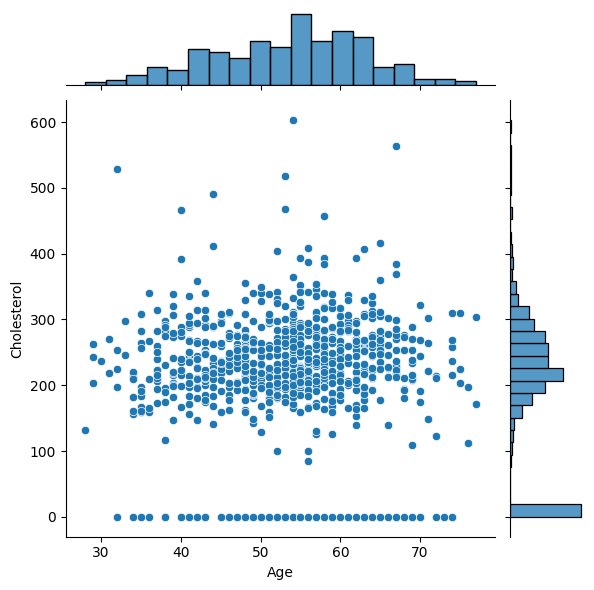

In [18]:
sns.jointplot(x=data['Age'],y=data['Cholesterol'])

# Visualizing Multiple Feature Relationships with Pairplot

The sns.pairplot function from the Seaborn library creates a matrix of scatterplots and histograms to visualize pairwise relationships between multiple features in a dataset. It helps to:

- **Explore interactions** between different pairs of features simultaneously.
- **Identify correlations** or dependencies among features.
- **Compare distributions** of each feature across the dataset.
- **Detect clusters or patterns** that might indicate different classes or groups.
- **Spot outliers** across multiple dimensions.

Using a pairplot on the Heart Disease dataset allows us to quickly understand how features relate to each other, which is essential for feature selection and building effective predictive models.


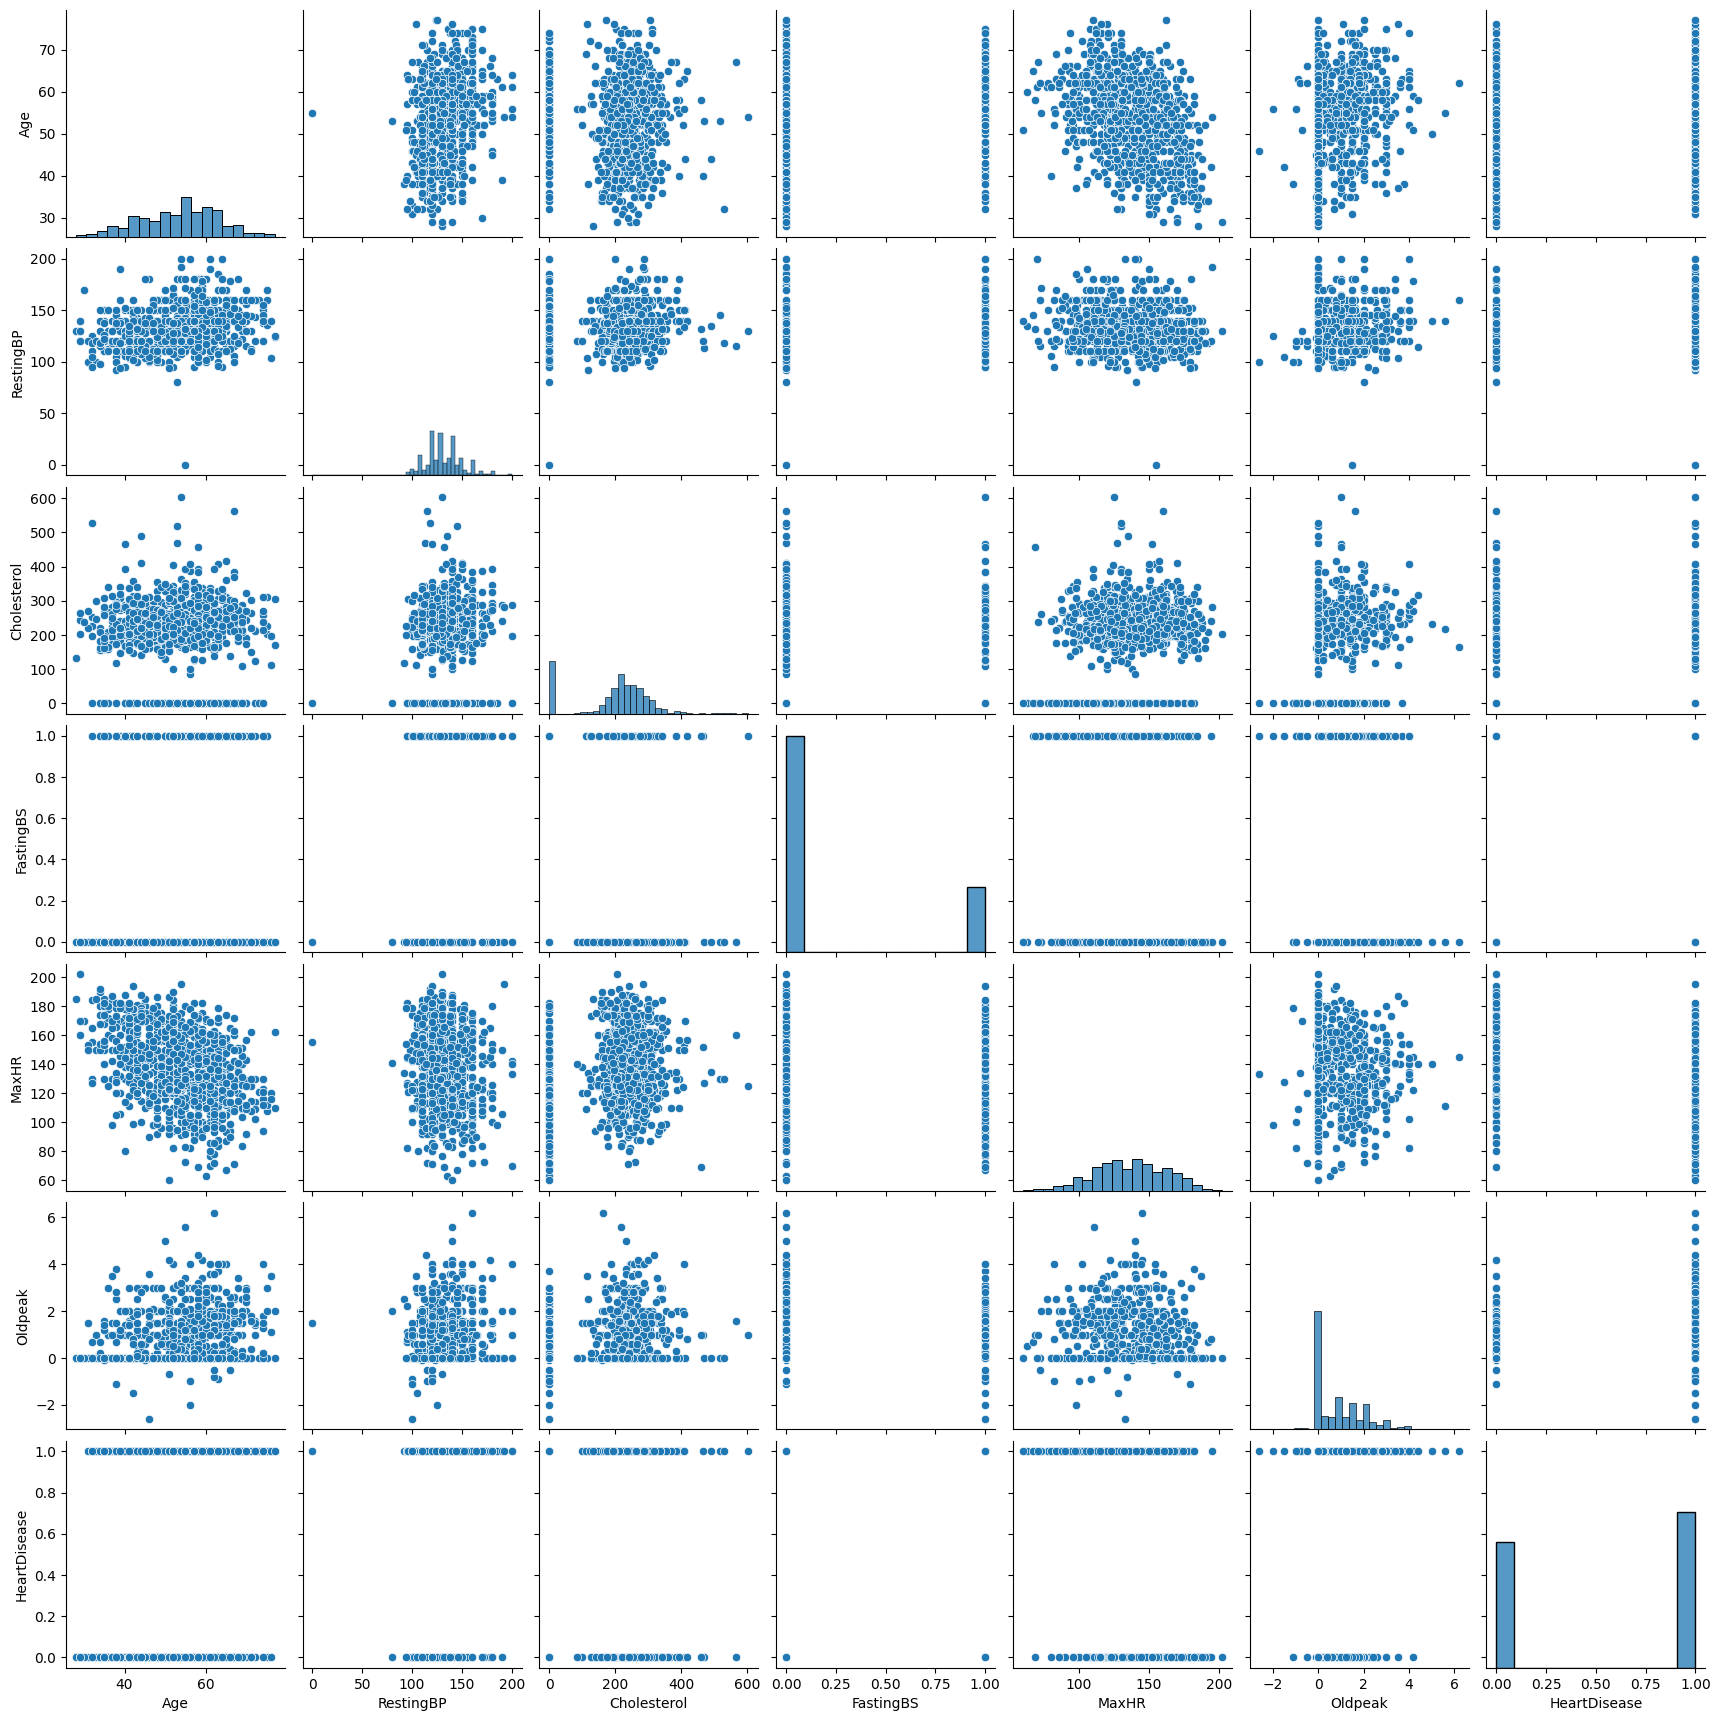

In [19]:
sns.pairplot(data)

## Correlation Heatmap

A correlation heatmap visually represents the pairwise correlations between numeric features in the dataset. Correlation values range from -1 to 1:

- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no correlation.

Analyzing the correlation heatmap helps identify:

- Strongly correlated features (which may cause redundancy),
- Potential multicollinearity issues,
- Features that have strong relationships with the target variable.




<Axes: >

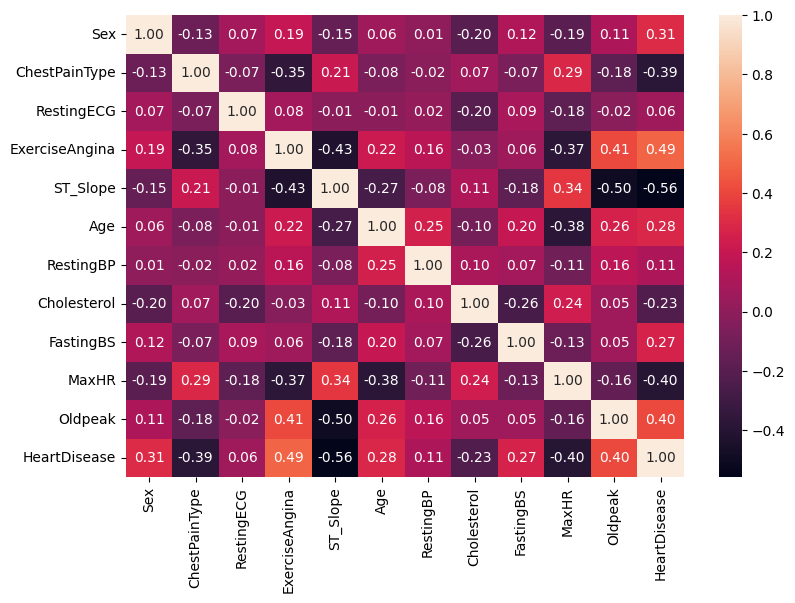

In [27]:
plt.figure(figsize=(9,6))
sns.heatmap(new_data.corr(), annot=True, fmt='.2f')

# Understanding Feature Distribution with Distplot

The sns.distplot function from Seaborn visualizes the distribution of a single continuous feature. It combines a histogram and a kernel density estimate (KDE) curve to show:

- How the data values are spread or concentrated.
- Whether the distribution is normal, skewed, or has multiple peaks.
- Potential presence of outliers.

This helps us understand the nature of a feature, which is important for choosing the right data preprocessing and modeling techniques.


/tmp/ipython-input-3639826312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],bins=5)


<Axes: xlabel='Age', ylabel='Density'>

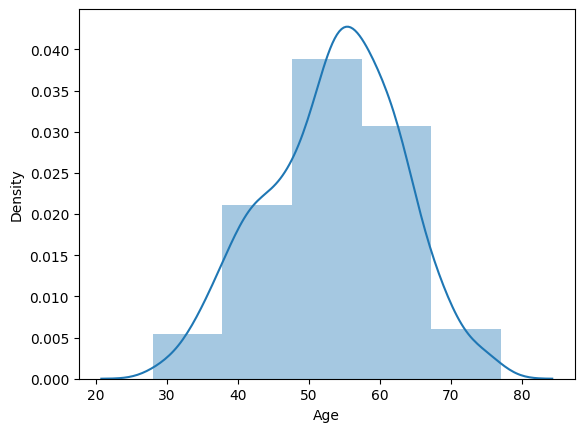

In [20]:
sns.distplot(data['Age'],bins=5)

## Splitting the Dataset into Features and Target

Before training a machine learning model, the dataset needs to be separated into:

- **Features (X):** The input variables used for prediction.
- **Target (y):** The output variable to be predicted.

After separating, the data is split into **training** and **testing** sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data.




In [41]:
X=new_data.iloc[:,:-1]
y=new_data.iloc[:,-1]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DecisionTreeClassifier(max_depth=5)
accuracy score :  86.41304347826086
Confusion Matrix 
 [[68  9]
 [16 91]]
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

RandomForestClassifier(max_depth=4, n_estimators=200)
accuracy score :  87.5
Confusion Matrix 
 [[67 10]
 [13 94]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

XGBClassifier(base_score=None, booster=None, callbacks=None,
            

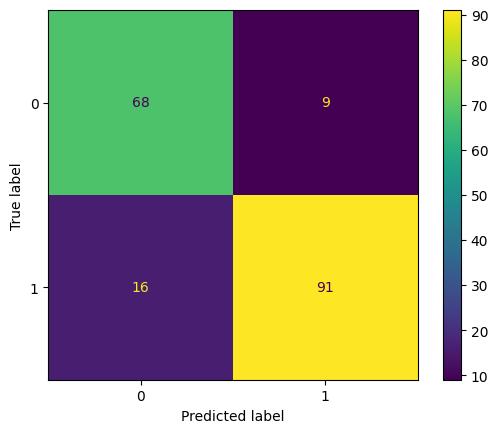

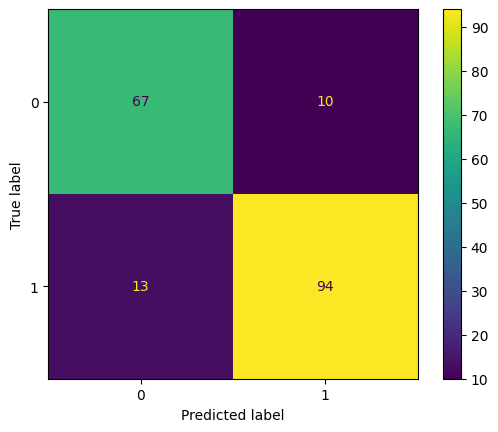

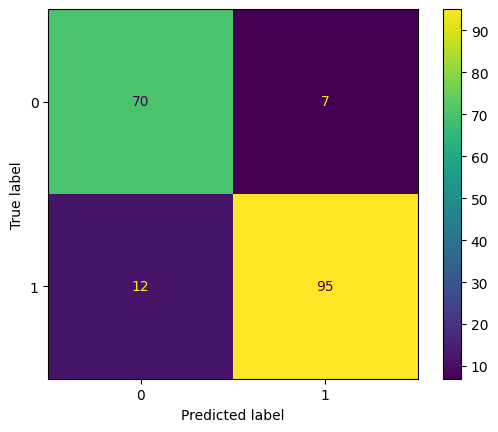

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

dtc = DecisionTreeClassifier(criterion='gini',max_depth=5)
rfc = RandomForestClassifier(n_estimators=200, max_depth=4)
xg  = xgb.XGBClassifier(n_estimators=50, max_depth=2,eval_metric='logloss')

model = [dtc, rfc, xg]

for i in model:
  i.fit(X_train,y_train)
  y_predict = i.predict(X_test)
  print(i)
  print("accuracy score : ",accuracy_score(y_test,y_predict)*100)
  print('Confusion Matrix \n',confusion_matrix(y_test,y_predict))
  print("Classification Report \n",classification_report(y_test,y_predict))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))


In [75]:
for j in model:
    j.fit(X_train, y_train)

    train_predict = j.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predict)

    test_predict = j.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predict)

    print(f"Train accuracy of {j.__class__.__name__}: {train_accuracy:.4f}")
    print(f"Test accuracy of {j.__class__.__name__}: {test_accuracy:.4f}")


Train accuracy of DecisionTreeClassifier: 0.8937
Test accuracy of DecisionTreeClassifier: 0.8641
Train accuracy of RandomForestClassifier: 0.8896
Test accuracy of RandomForestClassifier: 0.8750
Train accuracy of XGBClassifier: 0.9087
Test accuracy of XGBClassifier: 0.8967


# Conclusion from Model Comparison

Based on the accuracy scores and classification reports for the Decision Tree, Random Forest, and XGBoost classifiers on the heart disease dataset:

- **Decision Tree** achieved a test accuracy of approximately **86.4%**, with balanced precision and recall for both classes. It is simple and interpretable but prone to overfitting, as indicated by a higher train accuracy (~89.4%) compared to test accuracy.

- **Random Forest** improved performance, reaching a test accuracy of **87.5%**. By aggregating multiple decision trees and reducing overfitting through randomness, it provided better generalization and slightly higher recall and precision compared to a single decision tree.

- **XGBoost** outperformed both, achieving the highest test accuracy of **89.7%**, along with superior precision and recall metrics. Its gradient boosting approach effectively minimizes errors by sequentially learning from previous mistakes, making it the best-performing model in this comparison.

**Overall, XGBoost is the best choice for this heart disease classification task** due to its higher accuracy and better balance of precision and recall, followed by Random Forest, with Decision Tree performing adequately but less robustly. This highlights the advantage of ensemble and boosting methods over single-tree models in predictive accuracy and generalization.


# Introduction to Voting Classifier and Its Difference from Normal Model Comparison

**Voting Classifier:**  
A Voting Classifier is an ensemble machine learning method that combines the predictions of multiple different models (called base estimators) to make a final decision. It works by aggregating the votes from each individual model to improve overall accuracy and robustness. There are two common types of voting:  
- **Hard Voting:** The final prediction is based on the majority class predicted by the base models.  
- **Soft Voting:** The predicted class is based on the average of predicted probabilities from the base models, choosing the class with the highest average probability.

**Difference from Normal Model Comparison:**  
- In **normal model comparison**, multiple models are trained and evaluated separately, and their performances are compared to choose the best one.  
- In contrast, a **Voting Classifier combines** multiple models to create a single, stronger predictor that leverages the strengths of each base model, often leading to better generalization and performance than any individual model.

Thus, while model comparison helps identify the best standalone model, the Voting Classifier uses ensemble learning to harness the collective power of several models for improved prediction.


Voting Classifier - Train Accuracy: 0.9074
Voting Classifier - Test Accuracy: 0.8913

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.92      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Confusion Matrix:
 [[69  8]
 [12 95]]


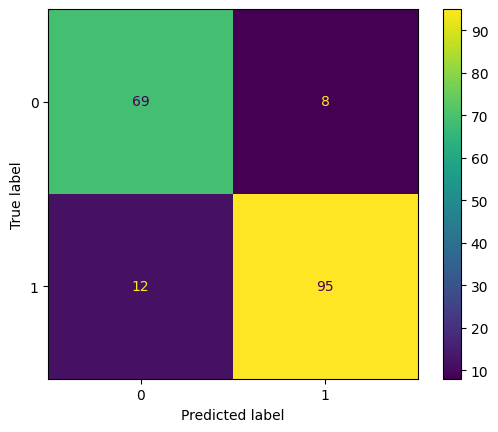

In [78]:
from sklearn.ensemble import VotingClassifier

model1 = DecisionTreeClassifier(criterion='gini',max_depth=5)
model2 = RandomForestClassifier(n_estimators=200, max_depth=4)
model3 = xgb.XGBClassifier(n_estimators=50, max_depth=2,eval_metric='logloss')

voting_classifier = VotingClassifier(estimators=[
    ('dtc', model1),
    ('rfc', model2),
    ('xg', model3)
], voting='hard')

voting_classifier.fit(X_train, y_train)

y_pred_train = voting_classifier.predict(X_train)
y_pred_test = voting_classifier.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Voting Classifier - Train Accuracy: {train_acc:.4f}")
print(f"Voting Classifier - Test Accuracy: {test_acc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

# Conclusion on Voting Classifier Performance

The Voting Classifier achieved a **train accuracy of 90.7%** and a **test accuracy of 89.1%**, demonstrating strong generalization and minimal overfitting.

The classification report shows balanced and high precision and recall values for both classes:
- Class 0 (no heart disease) precision: 85%, recall: 90%
- Class 1 (heart disease) precision: 92%, recall: 89%

The confusion matrix further confirms the model’s effectiveness in correctly classifying most instances of both classes, with relatively few misclassifications.

Overall, the Voting Classifier provides a robust predictive performance by combining the strengths of multiple base models, outperforming or matching individual models like Decision Tree, Random Forest, and XGBoost. This makes it a reliable choice for heart disease prediction tasks.


# Overall Conclusion: Model Comparison and Best Choice

 compared four models — Decision Tree, Random Forest, XGBoost, and Voting Classifier — on the heart disease prediction task using accuracy, precision, recall, F1-score, and confusion matrices. Here are the key takeaways:

- **Decision Tree** achieved a test accuracy of about **86.4%**. It is simple and interpretable but showed a gap between train (89.4%) and test accuracy, indicating some overfitting. Precision and recall were balanced but slightly lower than ensemble methods.

- **Random Forest**, an ensemble of decision trees, improved the test accuracy to **87.5%** by reducing overfitting through bootstrapping and random feature selection. It also showed better precision and recall, making it more reliable than a single decision tree.

- **XGBoost**, a gradient boosting ensemble method, delivered the highest test accuracy of **89.7%** among individual models. It effectively reduces errors by learning sequentially and applying regularization, leading to strong predictive power and balanced classification metrics.

- **Voting Classifier**, which combines predictions from multiple base models (likely including the above), achieved a test accuracy of **89.1%**. It showed balanced precision and recall, demonstrating robust performance by leveraging the strengths of each constituent model.

### Which Model is Best?

- While **XGBoost** achieved the highest test accuracy (89.7%), the **Voting Classifier** closely follows with 89.1% accuracy and tends to offer more stability by combining multiple models, reducing the risk of relying on a single model's biases or weaknesses.

- The Voting Classifier's ensemble approach often results in better generalization and robustness, making it a highly reliable choice in practice.

- Considering both accuracy and model stability, **XGBoost and the Voting Classifier are the best-performing models** for this heart disease classification task, with a slight edge to XGBoost for raw accuracy and to Voting Classifier for ensemble robustness.

- **Decision Tree and Random Forest**, while valuable, show lower accuracy and are less effective compared to gradient boosting and ensemble voting in this scenario.

### Best Performing Models: Conclusion

For optimal predictive performance on the heart disease dataset, using **XGBoost** or a **Voting Classifier ensemble** is recommended. These methods combine accuracy, precision, recall, and generalization ability better than single decision trees or random forests alone.
